# Some necessary library imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [2]:
file_name = "RELIANCE"

## Some data preprocessing steps

In [8]:
data = pd.read_csv(file_name +'_l.csv')
data.drop(['Unnamed: 0'],axis = 1, inplace = True)
y = pd.DataFrame(data['CloseNext'])
X = data.drop(['CloseNext'], axis = 1)

In [9]:
X = np.array(X)
y = np.array(y)
#X = X[1700:2030,:]
#y = y[1700:2030,:]
y = y.flatten()

Feature scaling

In [11]:
scaled = StandardScaler()
scaled.fit(X)
X = scaled.transform(X)

Train Test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## ANN implementation

In [49]:
# define base model of our neural network for regression taks
def endgame():
    # Adding the neurons in various layers
    model = Sequential()
    model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model for our use in KerasRegressor
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mape'])
    return model

In [50]:
ann_regression = KerasRegressor(build_fn = endgame, epochs=100, batch_size=5, verbose=1)

In [51]:
ann_regression.fit(X_train,y_train)

Epoch 1/100
349/349 [==============================] - 1s 1ms/step - loss: 820887.7982 - mape: 99.4033
Epoch 2/100
349/349 [==============================] - 1s 2ms/step - loss: 274370.5278 - mape: 65.2842
Epoch 3/100
349/349 [==============================] - 1s 2ms/step - loss: 45243.2435 - mape: 23.3555
Epoch 4/100
349/349 [==============================] - 1s 2ms/step - loss: 30826.5866 - mape: 19.0413
Epoch 5/100
349/349 [==============================] - 1s 2ms/step - loss: 20444.8944 - mape: 15.9326
Epoch 6/100
349/349 [==============================] - 1s 2ms/step - loss: 13345.7873 - mape: 12.5257
Epoch 7/100
349/349 [==============================] - 1s 2ms/step - loss: 8174.5123 - mape: 9.7288
Epoch 8/100
349/349 [==============================] - 1s 1ms/step - loss: 4496.0834 - mape: 7.1996
Epoch 9/100
349/349 [==============================] - 1s 1ms/step - loss: 3200.3299 - mape: 5.6369
Epoch 10/100
349/349 [==============================] - 1s 2ms/step - loss: 2394.8644 

In [67]:
#ann_predict =
ann_regression.predict(X_test[0].reshape(1,9))

1/1 [==============================] - 0s 32ms/step


array(758.7831, dtype=float32)

In [61]:
X_test.shape

(748, 9)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [55]:
ann_predict = ann_regression.predict(X_test)

150/150 [==============================] - 0s 1ms/step


# Testing

In [28]:
error = mean_absolute_error(ann_predict,y_test)
per_err = (error/np.mean(y_test)) * 100

In [29]:
print('The mean absolute error is {} and percentage error is {}.'.format(error,per_err))

The mean absolute error is 12.079560958127924 and percentage error is 1.5477661341343136.


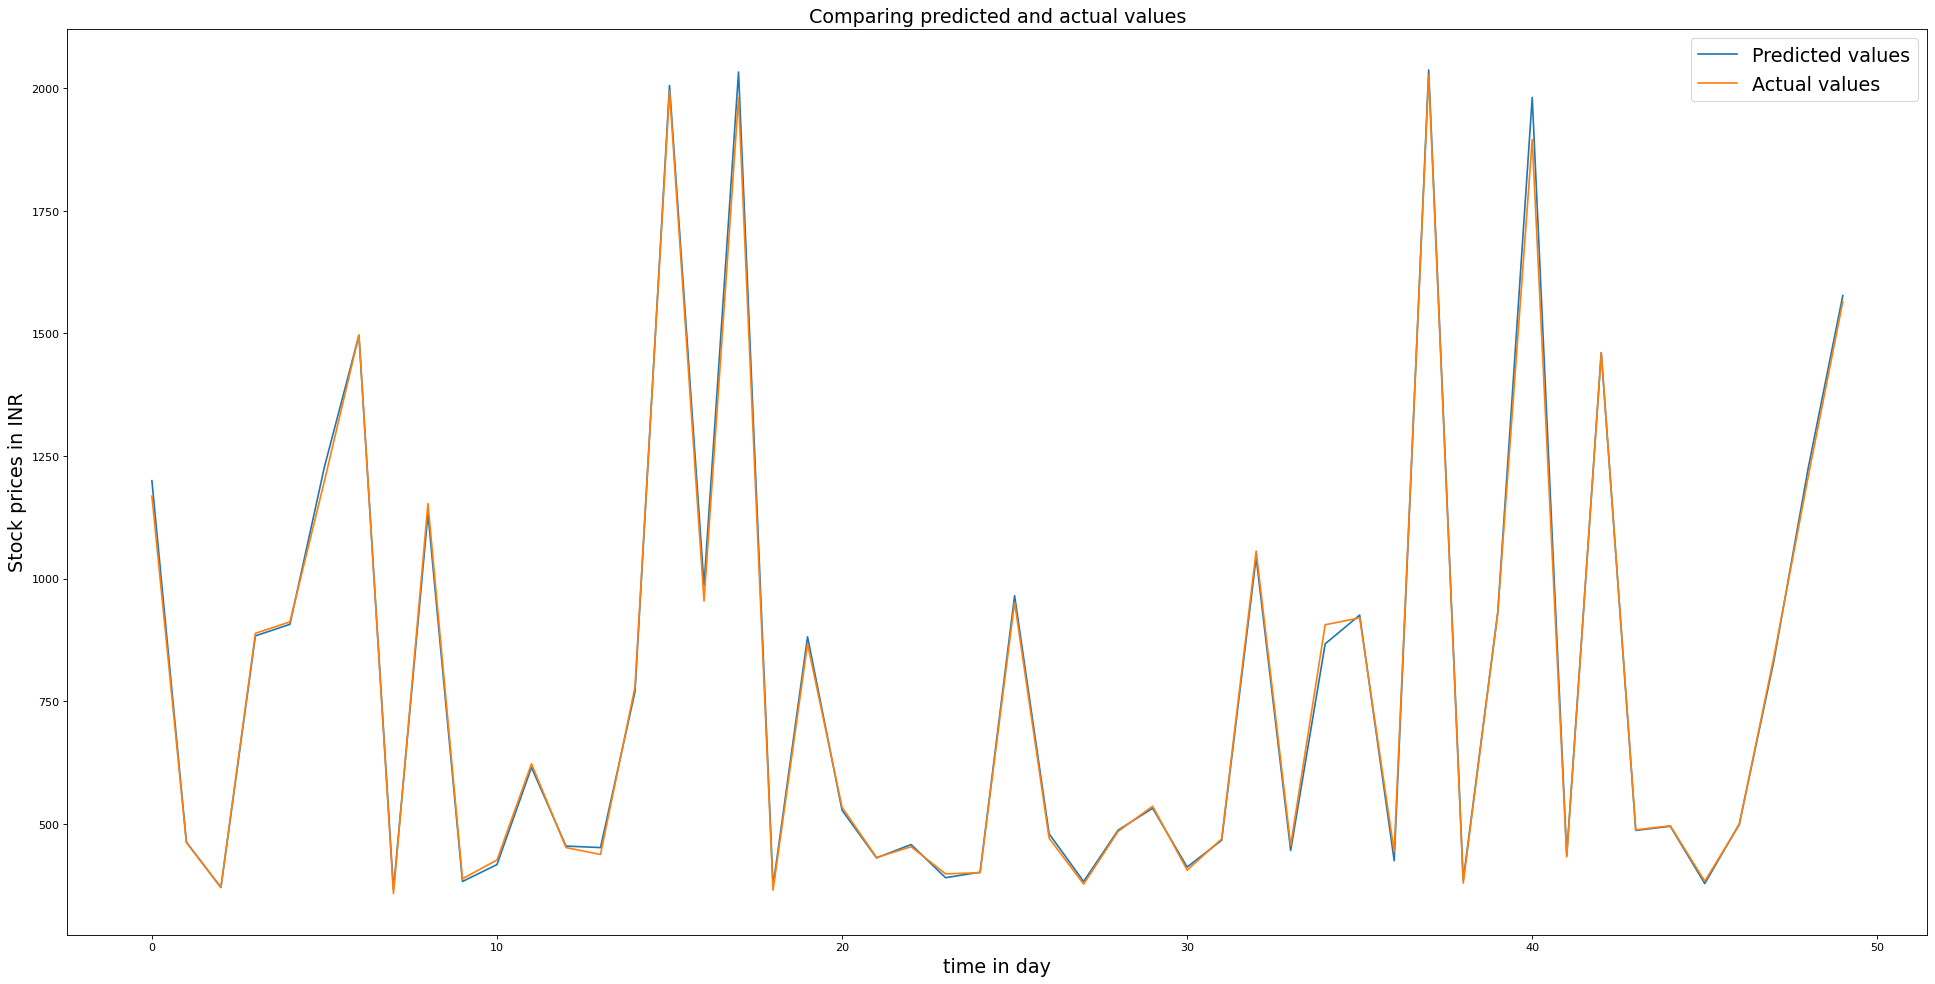

In [30]:
fig=plt.figure(figsize=(30, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(ann_predict[0:50],label = "Predicted values")
plt.plot(y_test[0:50], label = "Actual values")
plt.xlabel('time in day', fontsize = 'xx-large')
plt.ylabel('Stock prices in INR', fontsize = 'xx-large')
plt.title('Comparing predicted and actual values', fontsize = 'xx-large')
plt.legend(fontsize = 'xx-large')
plt.show()